In [2]:
#Data Load and Check
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [3]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Outlier Detection
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
def outlier_detect(feature, data):
    outlier_index=[]
    
    for each in feature:
        Q1=np.percentile(data[each],25)
        Q3=np.percentile(data[each],75)
        IQR=Q3-Q1
        min_quartile=Q1-1.5*IQR
        max_quartile=Q3+1.5*IQR
        outlier_list=data[(data[each]<min_quartile)|(data[each]>max_quartile)].index
        outlier_index.extend(outlier_list)
        
    outlier_index=Counter(outlier_index)
    outlier_data=list(i for i,n in outlier_index.items() if n>3)
    return outlier_data

In [8]:
outlier_data=outlier_detect(["Age","SibSp","Parch","Fare"],train_data)
train_data.loc[outlier_data]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [9]:
train_data=train_data.drop(outlier_data, axis=0).reset_index(drop=True)

In [10]:
#Combinig Train and Test Data
data=pd.concat([train_data,test_data],axis=0).reset_index(drop=True)

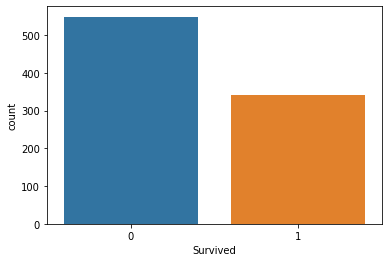

In [12]:
#Feature Analysis
#Survived
sns.countplot("Survived",data=train_data)

In [13]:
data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [14]:
#Data Analysis
#Sex - Survived
data[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


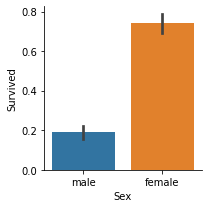

In [15]:
sns.factorplot(x="Sex",y="Survived",data=data,kind="bar",size=3)
plt.show()

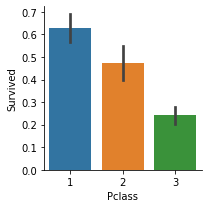

In [16]:
#Pclass - Survived
sns.factorplot(x="Pclass",y="Survived",data=data,kind="bar",size=3)
plt.show()

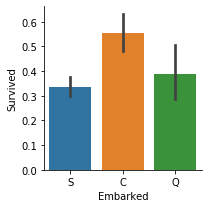

In [17]:
#Embarked - Survived
sns.factorplot(x="Embarked",y="Survived",data=data,kind="bar",size=3)
plt.show()

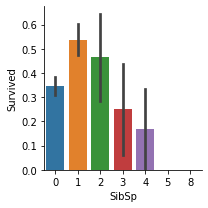

In [18]:
#SibSp - Survived
sns.factorplot(x="SibSp",y="Survived",data=data,kind="bar",size=3)
plt.show()

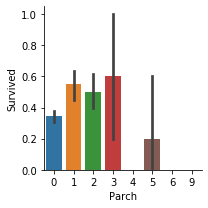

In [19]:
#Parch - Survived
sns.factorplot(x="Parch",y="Survived",data=data,kind="bar",size=3)
plt.show()

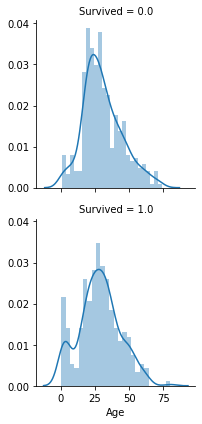

In [20]:
#Age - Survived
g=sns.FacetGrid(data, row="Survived")
g.map(sns.distplot,"Age",bins=25)
plt.show()

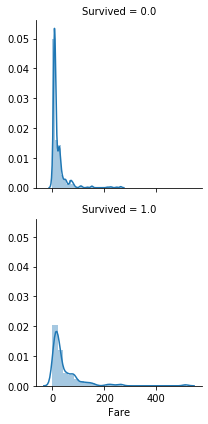

In [21]:
#Fare - Survived
g=sns.FacetGrid(data, row="Survived")
g.map(sns.distplot,"Fare",bins=25)
plt.show()

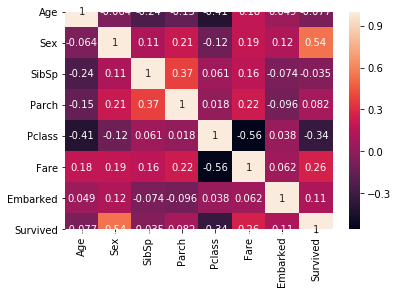

In [22]:
#Correlation Between Features
data["Sex"].replace(["male","female"],[0,1],inplace=True)
data["Embarked"].replace(["S","C","Q"],[0,1,2],inplace=True)
sns.heatmap(data[["Age","Sex","SibSp","Parch","Pclass","Fare","Embarked","Survived"]].corr(),annot=True)
plt.show()

In [23]:
#Missing Value
#Find Missing Value
data.columns[data.isnull().any()]

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Survived'], dtype='object')

In [24]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [25]:
#Fill Missing Value
data[data["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,0.0,NaN,"Storey, Mr. Thomas",0,1044,3,0,0,NaN,3701


In [26]:
data["Fare"]=data["Fare"].fillna(np.mean(data[((data["Pclass"]==3)&(data["Embarked"]==0))]["Fare"]))
data[data["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [27]:
#Embarked Fill Value
data[data["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,1,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,1,0,1.0,113572


In [28]:
data["Embarked"]=data["Embarked"].fillna(1)
data[data["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [29]:
#Age Fill Value
data[data["Age"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,NaN,2.0,8.4583,"Moran, Mr. James",0,6,3,0,0,0.0,330877
17,NaN,NaN,0.0,13.0000,"Williams, Mr. Charles Eugene",0,18,2,0,0,1.0,244373
19,NaN,NaN,1.0,7.2250,"Masselmani, Mrs. Fatima",0,20,3,1,0,1.0,2649
26,NaN,NaN,1.0,7.2250,"Emir, Mr. Farred Chehab",0,27,3,0,0,0.0,2631
28,NaN,NaN,2.0,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,1,0,1.0,330959
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,NaN,NaN,2.0,7.7208,"Riordan, Miss. Johanna Hannah""""",0,1300,3,1,0,NaN,334915
1301,NaN,NaN,2.0,7.7500,"Naughton, Miss. Hannah",0,1302,3,1,0,NaN,365237
1304,NaN,NaN,0.0,8.0500,"Spector, Mr. Woolf",0,1305,3,0,0,NaN,A.5. 3236
1307,NaN,NaN,0.0,8.0500,"Ware, Mr. Frederick",0,1308,3,0,0,NaN,359309


In [31]:
data_age_nan_index=data[data["Age"].isnull()].index
for i in data_age_nan_index:
    mean_age=data["Age"][(data["Pclass"]==data.iloc[i]["Pclass"])].median()
    data["Age"].iloc[i]=mean_age
data[data["Age"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


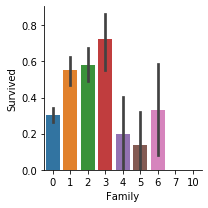

In [32]:
#Data Engineering
#New Feature
#Alone and Family
#Family=SibSp+Parch
data["Family"]=data["SibSp"]+data["Parch"]
sns.factorplot(x="Family",y="Survived",data=data,kind="bar",size=3)
plt.show()

In [33]:
data["Alone"]=[1 if i==0 else 0 for i in data["Family"]]
data["Family"].replace([0,1,2,3,4,5,6,7,10],[0,1,1,1,0,2,0,2,2],inplace=True)
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family,Alone
0,22.0,NaN,0.0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,1,0
1,38.0,C85,1.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,1,0
2,26.0,NaN,0.0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,0,1
3,35.0,C123,0.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,1,0
4,35.0,NaN,0.0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,0,1


In [34]:
#Name - Title
data["Title"]=data.Name.str.extract('([A-Za-z]+)\.')

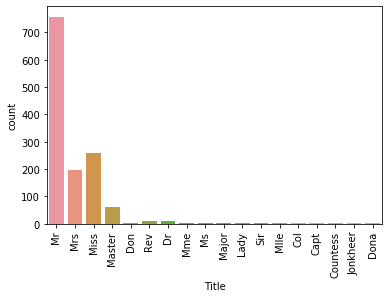

In [35]:
sns.countplot(data["Title"])
plt.xticks(rotation=90)
plt.show()

In [38]:
data["Title"].replace(["Mme","Ms","Mlle","Lady","Countess","Dona","Dr","Major","Sir","Capt","Don","Rev","Col","Jonkheer"],["Miss","Miss","Miss","Mrs","Mrs","Mrs","Mr","Mr","Mr","Mr","Mr","Other","Other","Other"],inplace=True)

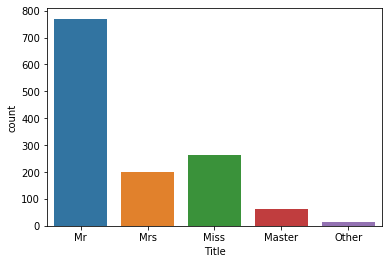

In [39]:
sns.countplot(data["Title"])
plt.show()

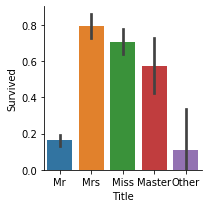

In [40]:
sns.factorplot(x="Title",y="Survived",data=data,kind="bar",size=3)
plt.show()

In [41]:
data["Title"].replace(["Mr","Mrs","Miss","Master","Other"],[1,2,2,3,1],inplace=True)

In [42]:
#Age Limit
data["Age_Limit"]=pd.cut(data["Age"],5)
data.groupby(["Age_Limit"])["Survived"].mean().to_frame().style.background_gradient(cmap="summer_r")

,Survived
Age_Limit,
"(0.0902, 16.136]",0.55
"(16.136, 32.102]",0.336714
"(32.102, 48.068]",0.412844
"(48.068, 64.034]",0.434783
"(64.034, 80.0]",0.0909091


In [43]:
data["Age_Limit"]=LabelEncoder().fit_transform(data["Age_Limit"])

In [46]:
#Fare Limit
data["Fare_Limit"]=pd.qcut(data["Fare"],4)
data.groupby(["Fare_Limit"])["Survived"].mean().to_frame().style.background_gradient(cmap="summer_r")

,Survived
Fare_Limit,
"(-0.001, 7.896]",0.197309
"(7.896, 14.454]",0.303571
"(14.454, 31.275]",0.441048
"(31.275, 512.329]",0.6


In [47]:
data["Fare_Limit"]=LabelEncoder().fit_transform(data["Fare_Limit"])

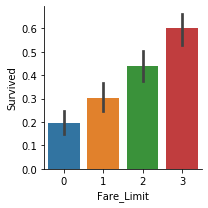

In [48]:
sns.factorplot(x="Fare_Limit",y="Survived",data=data,kind="bar",size=3)
plt.show()

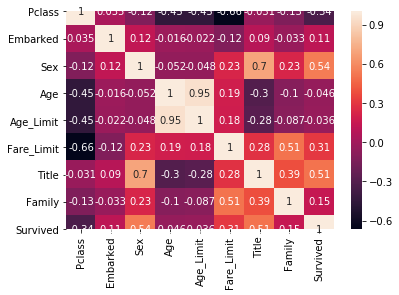

In [49]:
#Correlation Matrix
sns.heatmap(data[["Cabin","Pclass","Embarked","Sex","Age","Age_Limit","Fare_Limit","Title","Family","Survived"]].corr(),annot=True)
plt.show()

In [50]:
#Drop Features
data["Age"]=data["Age"].astype(int)

data.drop(labels=["SibSp","Parch","Cabin","Fare","Age","Ticket","Name","PassengerId"],axis=1,inplace=True)
data.head()

,Embarked,Pclass,Sex,Survived,Family,Alone,Title,Age_Limit,Fare_Limit
0,0.0,3,0,0.0,1,0,1,1,0
1,1.0,1,1,1.0,1,0,2,2,3
2,0.0,3,1,1.0,0,1,2,1,1
3,0.0,1,1,1.0,1,0,2,2,3
4,0.0,3,0,0.0,0,1,1,2,1


In [51]:
data=pd.get_dummies(data,columns=["Pclass"])
data=pd.get_dummies(data,columns=["Embarked"])
data=pd.get_dummies(data,columns=["Family"])
data=pd.get_dummies(data,columns=["Age_Limit"])
data=pd.get_dummies(data,columns=["Fare_Limit"])
data=pd.get_dummies(data,columns=["Title"])

data.head()

,Sex,Survived,Alone,Pclass_1,Pclass_2,Pclass_3,Embarked_0.0,Embarked_1.0,Embarked_2.0,Family_0,...,Age_Limit_2,Age_Limit_3,Age_Limit_4,Fare_Limit_0,Fare_Limit_1,Fare_Limit_2,Fare_Limit_3,Title_1,Title_2,Title_3
0,0,0.0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,1.0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
2,1,1.0,1,0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,1,1.0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,0,0.0,1,0,0,1,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0


In [52]:
#Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [53]:
#Train Test Split
if len(data)==(len(train_data)+len(test_data)):
    print("Success")

Success


In [54]:
test=data[len(train_data):]
test.drop(labels="Survived",axis=1,inplace=True)

In [55]:
train=data[:len(train_data)]
X_train=train.drop(labels="Survived",axis=1)
y_train=train["Survived"]
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.3,random_state=42)

In [56]:
#Classification Methods
#Logistic Regression
log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)
print("Accuracy:",log_reg.score(X_test,y_test))

Accuracy: 0.8134328358208955


In [57]:
#Random Forest Regression
rf_reg=RandomForestClassifier(random_state=42)
rf_reg.fit(X_train,y_train)
print("Accuracy:",rf_reg.score(X_test,y_test))

Accuracy: 0.8097014925373134


In [58]:
#Support Vector Machine(SVM)
svm_clsf=SVC()
svm_clsf.fit(X_train,y_train)
print("Accuracy:",svm_clsf.score(X_test,y_test))

Accuracy: 0.8246268656716418


In [59]:
#KNN
best_knn=[]
for n in range(1,12):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    best_knn.insert(n,knn.score(X_test,y_test))
best_knn

[0.7723880597014925,
 0.7388059701492538,
 0.7350746268656716,
 0.7761194029850746,
 0.8171641791044776,
 0.8171641791044776,
 0.8208955223880597,
 0.8208955223880597,
 0.8097014925373134,
 0.8097014925373134,
 0.8097014925373134]

In [60]:
knn_clsf=KNeighborsClassifier(n_neighbors=8)
knn_clsf.fit(X_train,y_train)
print("Accuracy:",knn_clsf.score(X_test,y_test))

Accuracy: 0.8208955223880597


In [61]:
#Ensemble Modeling
voting_classification=VotingClassifier(estimators=[("knn",knn_clsf),("lg",log_reg),("rfg",rf_reg),("svc",svm_clsf)],voting="hard",n_jobs=-1)
voting_classification.fit(X_train,y_train)
print("Accuracy:",voting_classification.score(X_test,y_test))

Accuracy: 0.8246268656716418


In [62]:
#Result
test_result=pd.Series(voting_classification.predict(test),name="Survived").astype(int)
results=pd.concat([test_data["PassengerId"],test_result],axis=1)
results.to_csv("titanic_submission.csv",index=False)